# Mutual Information

Index(['28.Tacklerheadplacement'], dtype='object')


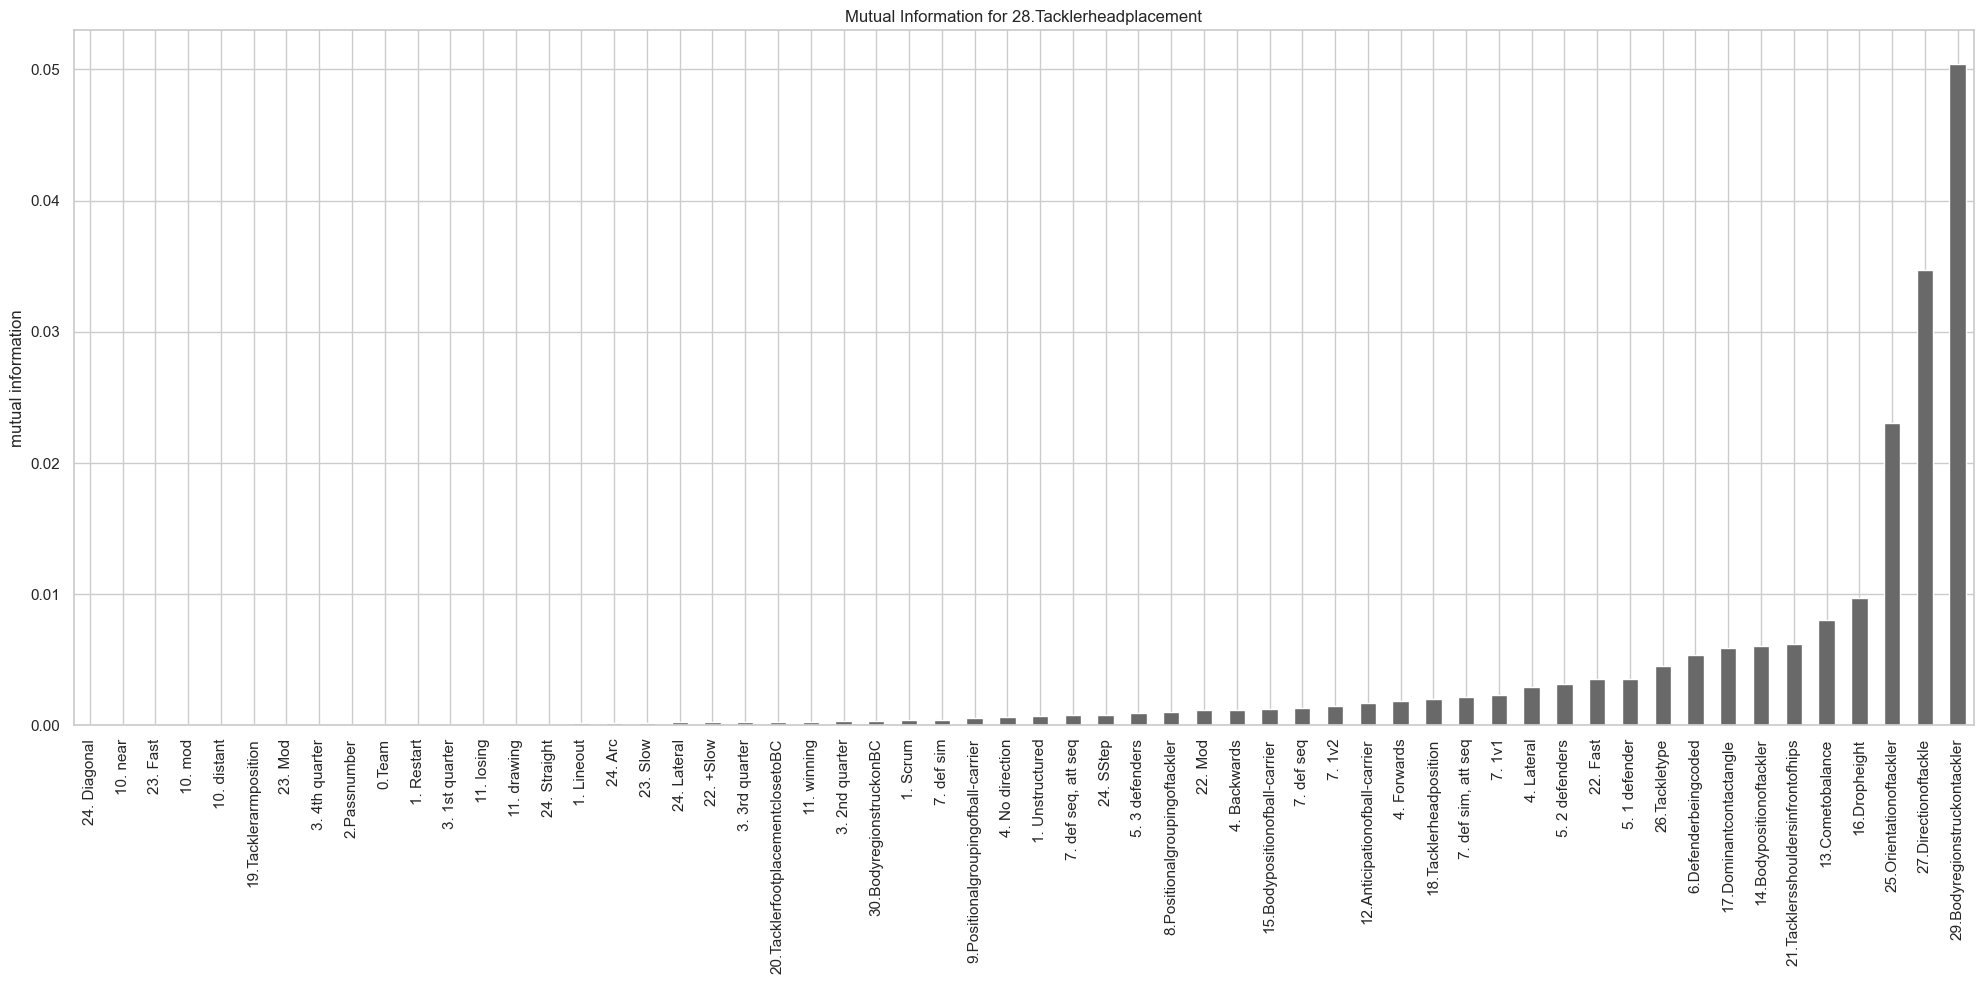

In [6]:
from sklearn.feature_selection import mutual_info_classif
from utils import get_feature_number, get_targets, get_features
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import os

sns.set_theme()
sns.set_style("whitegrid")


def plot_mutual_information(X_feature_names, y_feature_names, train_df, readable_map):
    y_train_from_dummies = pd.from_dummies(train_df[y_feature_names], sep='_')
    y_feature_name_str = readable_map[y_train_from_dummies.columns[0]][0]
    print(y_train_from_dummies.columns)
    y_train = np.squeeze(y_train_from_dummies.values)
    # We want to put binary features back into one column again for this analysis. 
    # Here we get all features with greater than two levels in the X features. 
    unique_gt_2_prefix = np.unique([name.split("_")[0] for name in X_feature_names if float(name.split('_')[-1]) > 1])
   
    unique_le_2  = []
    for feature in X_feature_names:
            any_lq_2 = [feature.startswith(u) for u in unique_gt_2_prefix]
            if True in any_lq_2:
                continue
            unique_le_2.append(feature)
    
    unique_gt_2 = [name for name in X_feature_names if name not in unique_le_2]
    # Put binary features back into one column,     
    unique_le_2_df = pd.from_dummies(train_df[unique_le_2], sep='_')
    assert len(set(unique_gt_2).intersection(set(unique_le_2 ))) == 0
    # Obtain all features with more than two levels. 
    unique_gt_2_df = train_df.loc[:, unique_gt_2 ].copy()
    # Concatenate collapsed binary features with all other features. 
    train_X_df = pd.concat([unique_le_2_df, unique_gt_2_df], axis=1)
    # Get feature names of new dataframe. 
    # Get human readable names of features. 
    # For binary variables the space free name e.g. '0.Team', the map is {'0.Team': ['0. Team', ['0. Finished bottom\n3 in 6N championship', '0. Finished top\n3 in 6N championship']],
    # so the first index is the human readable name of the column and the second is itself a list with the readable name for each binary level.
    X_feature_names_readable  = [readable_map[name][0] if isinstance(readable_map[name], list) else readable_map[name] for name in train_X_df.columns]
    X_train = train_X_df.to_numpy()
    # Add list of bools which tells the MI function whether each feature is discrete. 
    X_train_mi = mutual_info_classif(X_train, y_train, discrete_features = [True]*len(train_X_df))
    # Create dataframe with mutual information column. 
    mi_df = pd.DataFrame(X_train_mi, columns=["mutual_info"])
    # Create an index using the human readable names. These should be in order as these names were determined from the same dataframe
    # as the input array (i.e. X_train_df).
    mi_df.index =  X_feature_names_readable
    mi_df = mi_df.sort_values(by="mutual_info")
    mi_df.plot(kind="bar", figsize=(20,10), legend=False, ylabel="mutual information", color="dimgray")
    plt.title("Mutual Information for {}".format(y_feature_name_str))
    plt.tight_layout()
    plt.savefig(os.path.join("images", "mutual_information_{}.png".format(y_feature_name_str)))
    plt.show()
    return mi_df

def reformat_map(readable_map_orig):
    # Get the name of the feature irrespective of the level i.e. get "featureName" from "featureName_0"
    readable_map_prefixes = [k.split('_')[0] for k, v in readable_map_orig.items()]
    # Count the number of times a prefix occurs to figure out how many levels their are in each feature. 
    unique_feature_counts = dict(Counter(readable_map_prefixes))
    # Create reformatted map 
    binary_reformat_readable_map = dict()
    # Go through each feature and its human-readable definition
    for feature, definition in readable_map_orig.items():
        # Initialise the binary flag as false until we find a binary feature
        binary = False
        # Go through each feature name and count
        for unique_feature, counts in unique_feature_counts.items():
            # If this feature is binary
            if counts == 2: 
                # Check if our feature is one of the binary features and whether the reformated binary feature is not already
                # reformatted map
                if feature.startswith(unique_feature):
                    # Set binary flag to True
                    binary = True
                    if unique_feature not in binary_reformat_readable_map.keys():
                        # Reformat binary feature to list with the defintions for each of the levels. 
                        feature_level_0 = readable_map_orig["{}_0".format(unique_feature)]
                        feature_level_1 = readable_map_orig["{}_1".format(unique_feature)]
                        binary_reformat_readable_map[unique_feature] = [unique_feature, [feature_level_0, feature_level_1]]
        if not binary: 
             binary_reformat_readable_map[feature] = definition
        else:
            # we don't want to add the old format for bunary variables. 
            continue
    return binary_reformat_readable_map 

with open(os.path.join("data", "human_readable_labels_features.json"), "rb") as f:
    readable_map_orig = json.load(f)    
binary_reformat_readable_map = reformat_map(readable_map_orig)

data_dir = "data"
train_df = pd.read_csv(os.path.join("data", "train_31_vars.csv"))
# Create target feature array. 
y_feature_name_28 = '28.Tacklerheadplacement'
y_feature_names_28 = [name for name in train_df.columns if y_feature_name_28 in name]

# Get names of all features excluding target. 
X_subset_features_28 = [str(i) for i in range(31) if i !=28]
_,_, X_train_subset_28_feature_names = get_features(train_df, X_subset_features_28)
mi_28_df = plot_mutual_information(X_train_subset_28_feature_names, y_feature_names_28 , train_df, binary_reformat_readable_map)
mi_28_df.to_csv("28.Tacklerheadplacement_mi.csv")

Index(['29.Bodyregionstruckontackler'], dtype='object')


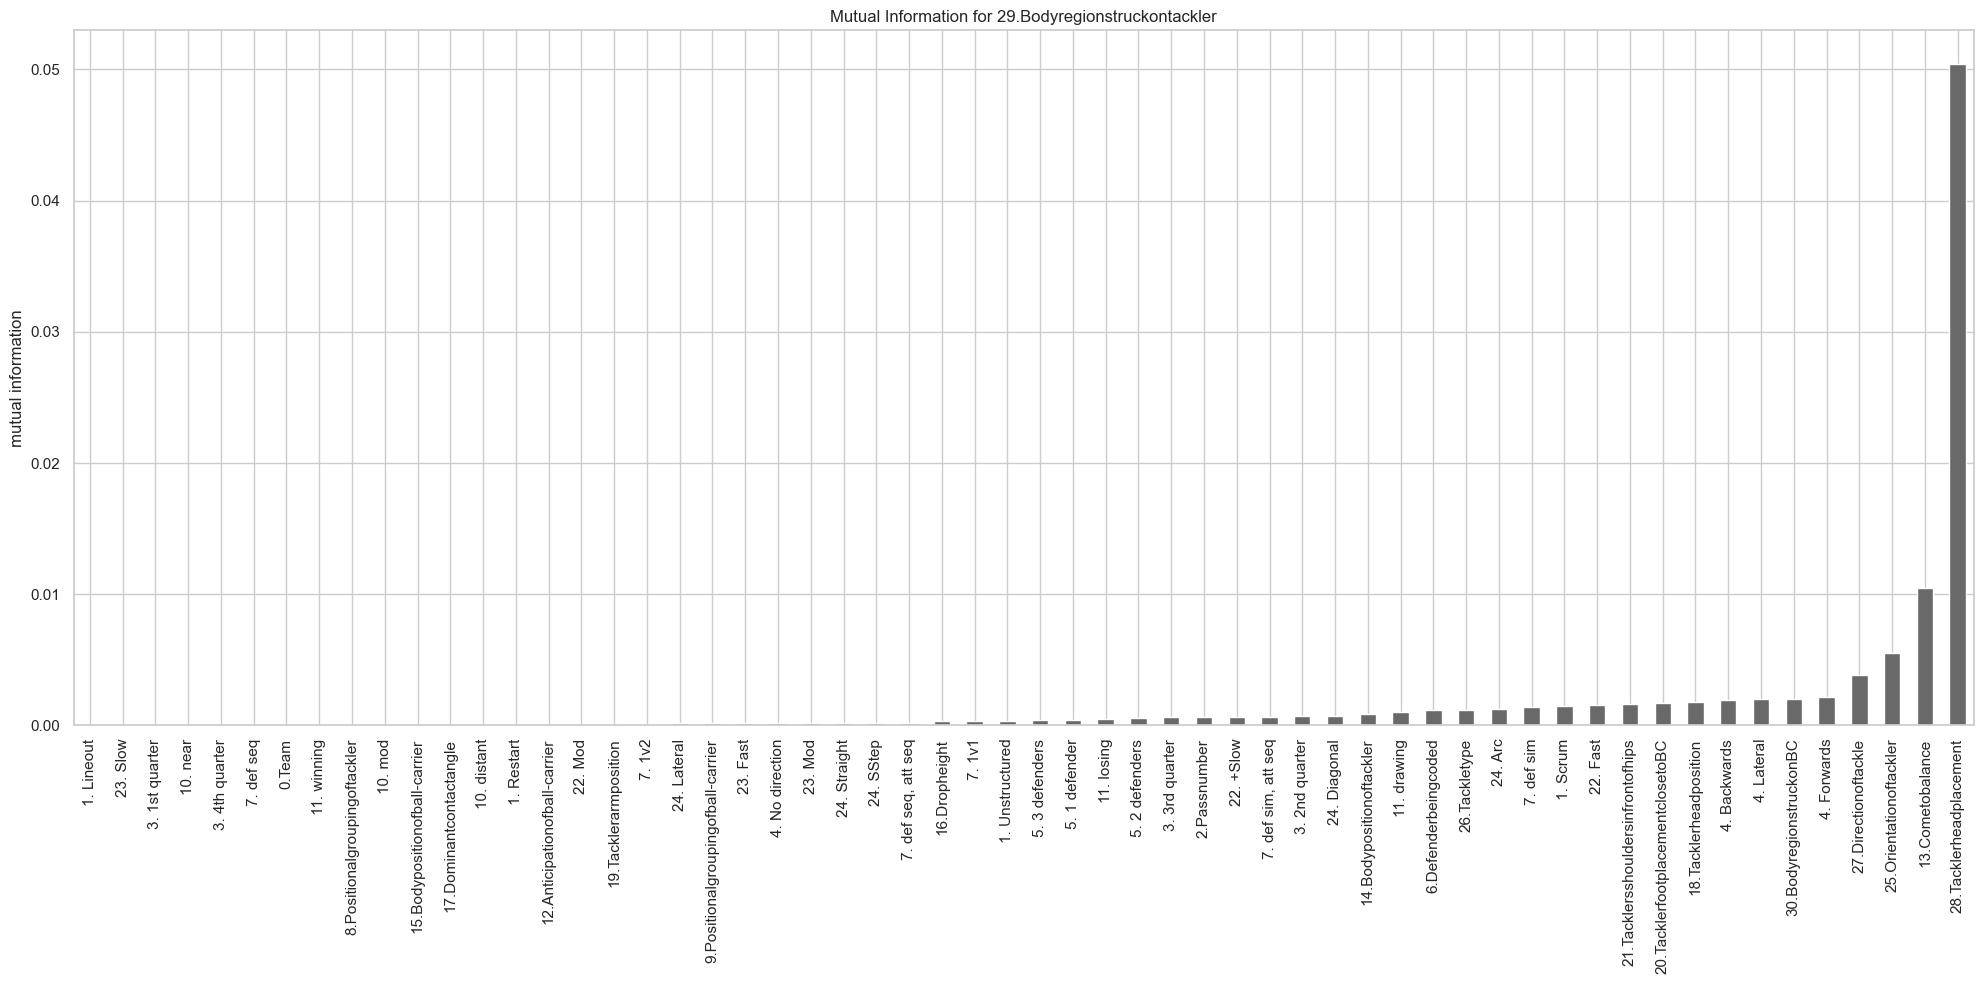

In [4]:
# Create target feature array. 
y_feature_name_29 = '29.Bodyregionstruckontackler'
y_feature_names_29 = [name for name in train_df.columns if y_feature_name_29 in name]

# Get names of all features excluding target. 
X_subset_features_29 = [str(i) for i in range(31) if i !=29]
_,_, X_train_subset_29_feature_names = get_features(train_df, X_subset_features_29)
mi_29_df = plot_mutual_information(X_train_subset_29_feature_names, y_feature_names_29 , train_df,  binary_reformat_readable_map)
mi_29_df.to_csv("29.Bodyregionstruckontackler_mi.csv")

Index(['30.BodyregionstruckonBC'], dtype='object')


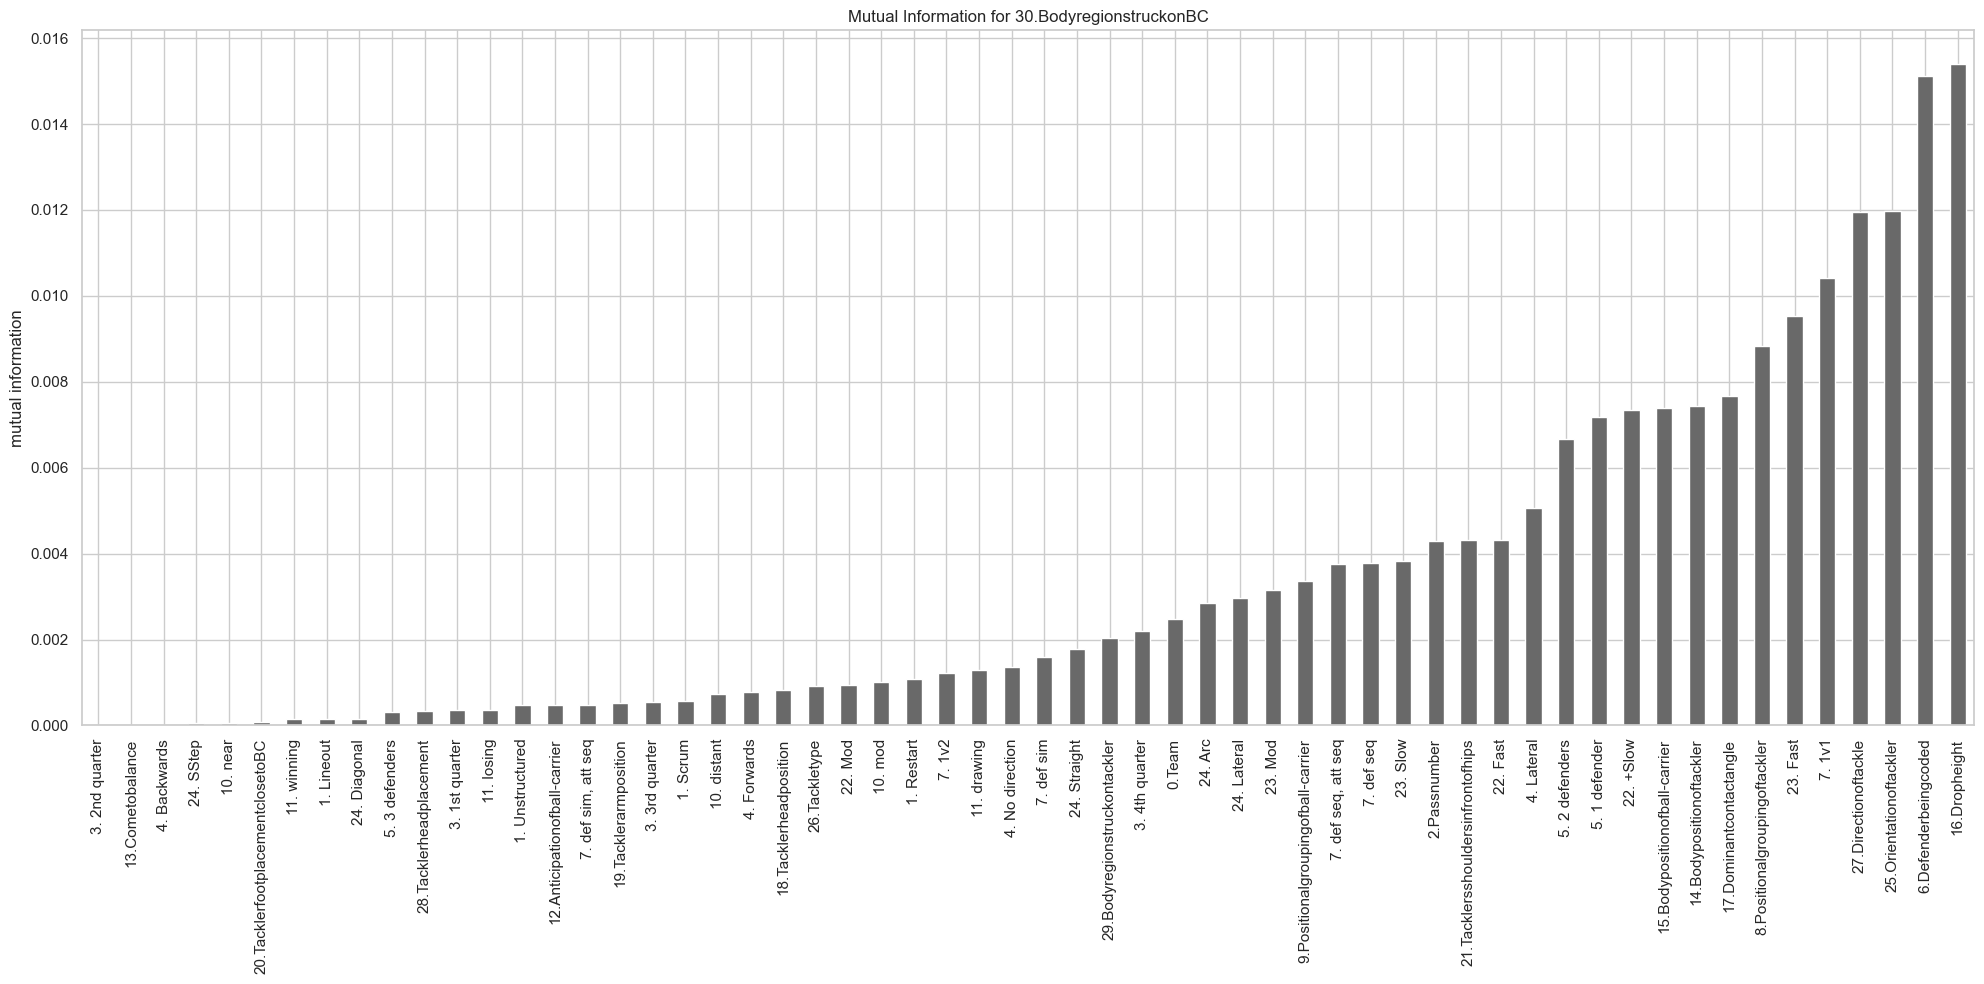

In [5]:
# Create target feature array. 
y_feature_name_30 = '30.BodyregionstruckonBC'
y_feature_names_30 = [name for name in train_df.columns if y_feature_name_30 in name]

# Get names of all features excluding target. 
X_subset_features_30 = [str(i) for i in range(31) if i !=30]
_,_, X_train_subset_30_feature_names = get_features(train_df, X_subset_features_30)
mi_30_df = plot_mutual_information(X_train_subset_30_feature_names, y_feature_names_30 , train_df,  binary_reformat_readable_map)
mi_30_df.to_csv("30.BodyregionstruckonBC_mi.csv")

In [4]:
# train_df is the original fully dummied dataframe (2 columns for binary variables) so we 
# can apply pd.from_dummies to the whole dataframe. 
X_from_dummies_df  = pd.from_dummies(train_df.copy(), sep='_')
# Initialise readable dataframe for features. 
readable_X_df = pd.DataFrame()
# Human readable feature label map

# Iterate through the the column
for col in X_from_dummies_df.columns: 
    # The split at the end is to remove the number at the beginning of the feature name. 
    # Get the human readable name for each value in the column. To do this, we take the name of the column and then append
    # the value within the row of the column to match the dictionary, i.e. <column_name>_<single index row value for that column>
    # The .split('.') splits the column name on the dot after the number i.e. it will split "1. Unstructured" into
    # [1,  Unstructured], and then we get the second index of this (.ie. index 1)
    readable_X_df[col]  = X_from_dummies_df[col].apply(lambda x : readable_map_orig["{}_{}".format(col, x)].split('.')[1])
readable_X_df    

,0.Team,1.Previousphase,2.Passnumber,3.Matchperiod,4.Defensivedirection,5.Numberofdefenders,6.Defenderbeingcoded,7.Tacklesequence,8.Positionalgroupingoftackler,9.Positionalgroupingofball-carrier,...,21.Tacklersshouldersinfrontofhips,22.Speedoftackler,23.SpeedofBC,24.BCdirectionofmovement,25.Orientationoftackler,26.Tackletype,27.Directionoftackle,28.Tacklerheadplacement,29.Bodyregionstruckontackler,30.BodyregionstruckonBC
0,Finished bottom\n3 in 6N championship,Unstructured,0-3 passes,2nd quarter,Forwards,2 defenders,1st defender,def seq,forwards,backs,...,Shoulders in line or behind hips,+Slow,Mod,Lateral,Side or behind,"arm, jersey, tap",side or behind,"beside, above or behind",Anywhere else,Anywhere else
1,Finished top\n3 in 6N championship,Unstructured,0-3 passes,2nd quarter,Forwards,2 defenders,1st defender,def seq,forwards,forwards,...,Shoulders in front of hips,Mod,Fast,SStep,In front or oblique,shoulder,side or behind,"beside, above or behind",Anywhere else,Anywhere else
2,Finished top\n3 in 6N championship,Unstructured,0-3 passes,4th quarter,Forwards,2 defenders,2nd defender,def sim,forwards,forwards,...,Shoulders in line or behind hips,+Slow,Fast,SStep,In front or oblique,"arm, jersey, tap",side or behind,"beside, above or behind",Anywhere else,Anywhere else
3,Finished top\n3 in 6N championship,Unstructured,4-6 passes,3rd quarter,Backwards,1 defender,1st defender,1v1,backs,backs,...,Shoulders in line or behind hips,Fast,Fast,SStep,Side or behind,"arm, jersey, tap",side or behind,"beside, above or behind",Anywhere else,Anywhere else
4,Finished bottom\n3 in 6N championship,Unstructured,0-3 passes,4th quarter,Forwards,2 defenders,1st defender,def seq,forwards,forwards,...,Shoulders in front of hips,Mod,Fast,SStep,In front or oblique,shoulder,"oblique, front-on",infront,Anywhere else,Anywhere else
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Finished top\n3 in 6N championship,Unstructured,0-3 passes,4th quarter,Forwards,1 defender,1st defender,1v1,forwards,backs,...,Shoulders in front of hips,Fast,Fast,Lateral,Side or behind,"arm, jersey, tap",side or behind,"beside, above or behind",Anywhere else,Anywhere else
1196,Finished bottom\n3 in 6N championship,Restart,0-3 passes,1st quarter,Forwards,3 defenders,2nd defender,def seq,backs,forwards,...,Shoulders in front of hips,+Slow,Fast,Diagonal,In front or oblique,"arm, jersey, tap","oblique, front-on","beside, above or behind",Anywhere else,Anywhere else
1197,Finished top\n3 in 6N championship,Unstructured,0-3 passes,1st quarter,Forwards,2 defenders,2nd defender,def seq,backs,forwards,...,Shoulders in line or behind hips,+Slow,Mod,Arc,In front or oblique,"arm, jersey, tap",side or behind,"beside, above or behind",Anywhere else,Anywhere else
1198,Finished bottom\n3 in 6N championship,Unstructured,0-3 passes,3rd quarter,Forwards,2 defenders,1st defender,def sim,forwards,forwards,...,Shoulders in front of hips,Mod,Fast,Arc,In front or oblique,shoulder,side or behind,"beside, above or behind",Anywhere else,Anywhere else


0. Team
Finished bottom\n3 in 6N championship    620
Finished top\n3 in 6N championship       580
Name: count, dtype: int64


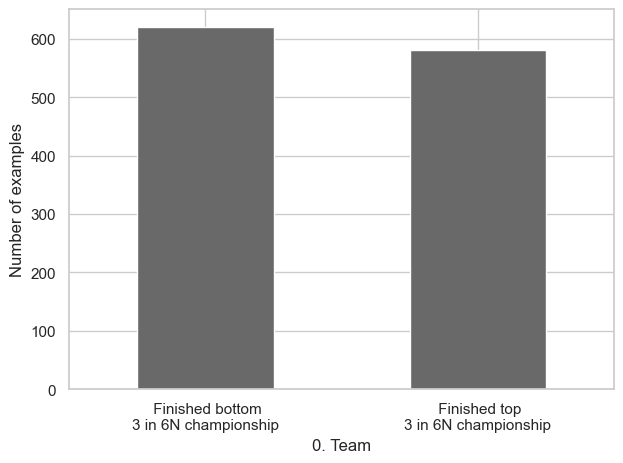

1. Previous phase
Unstructured    870
Lineout         147
Scrum           104
Restart          79
Name: count, dtype: int64


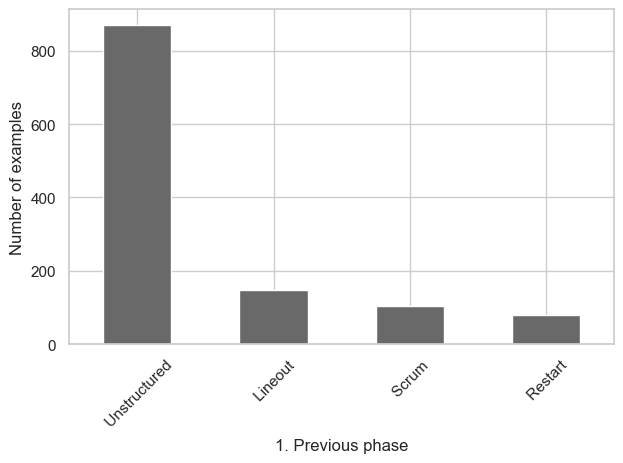

2. Pass number
0-3 passes    1124
4-6 passes      76
Name: count, dtype: int64


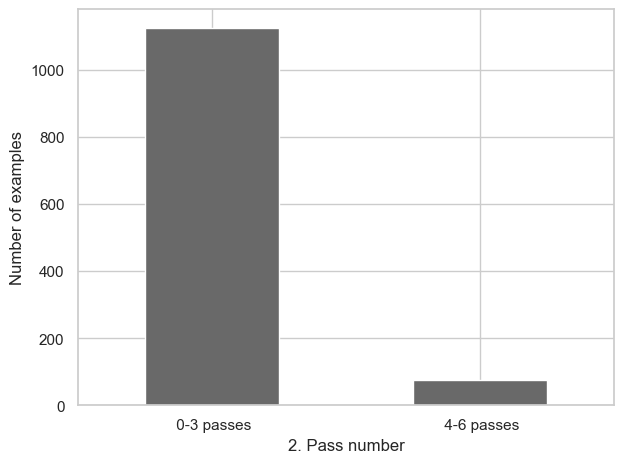

3. Match period
2nd quarter    315
3rd quarter    311
1st quarter    294
4th quarter    280
Name: count, dtype: int64


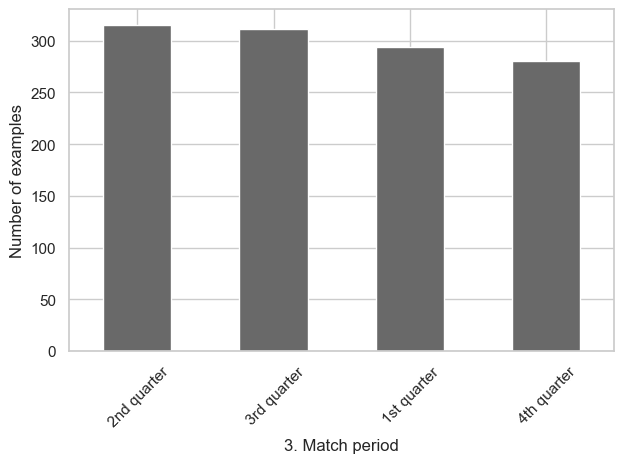

4. Defensive direction
Forwards        717
Lateral         246
No direction    152
Backwards        85
Name: count, dtype: int64


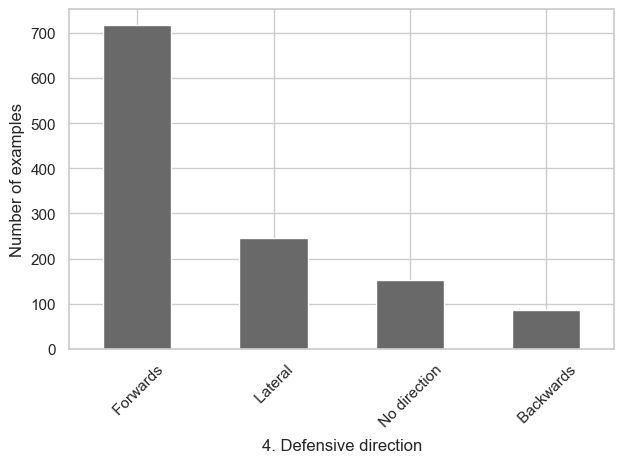

5. Number of defenders
1 defender     637
2 defenders    557
3 defenders      6
Name: count, dtype: int64


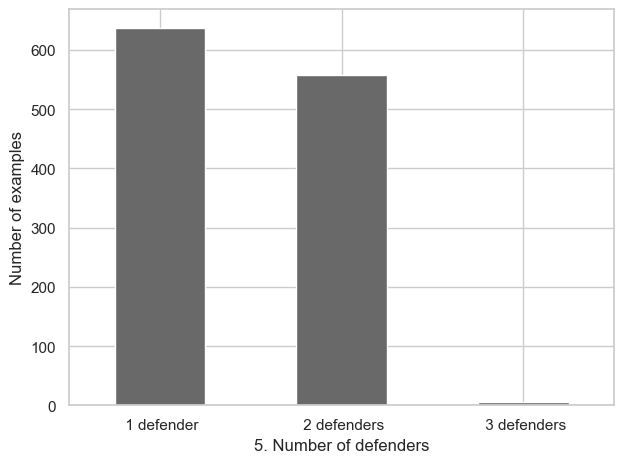

6. Defender being coded
1st defender    922
2nd defender    278
Name: count, dtype: int64


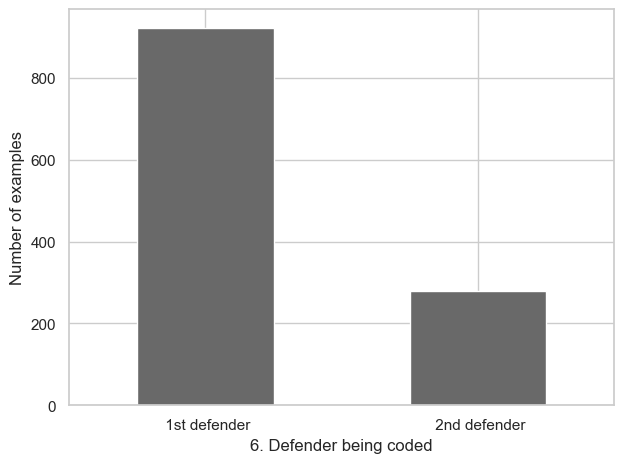

7. Tackle sequence
1v1                 610
def seq             465
def seq, att seq     57
def sim              29
1v2                  25
def sim, att seq     14
Name: count, dtype: int64


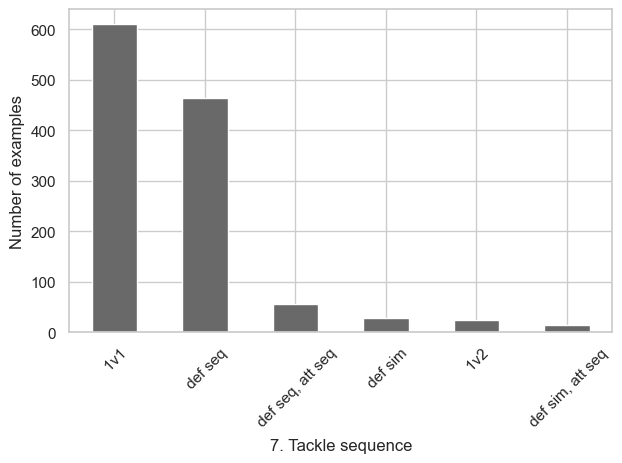

8. Positional grouping of tackler
forwards    690
backs       510
Name: count, dtype: int64


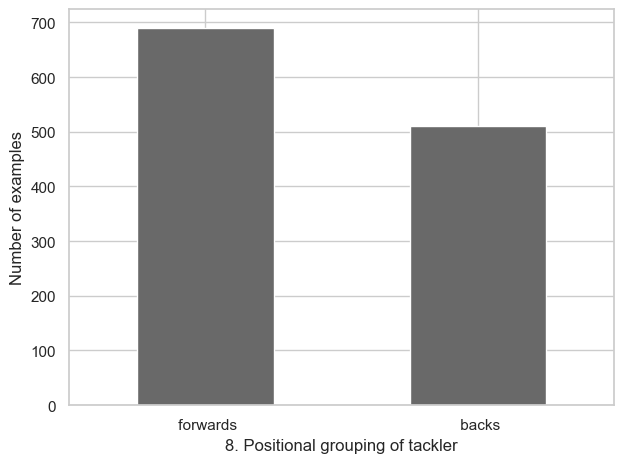

9. Positional grouping of ball-carrier
forwards    685
backs       515
Name: count, dtype: int64


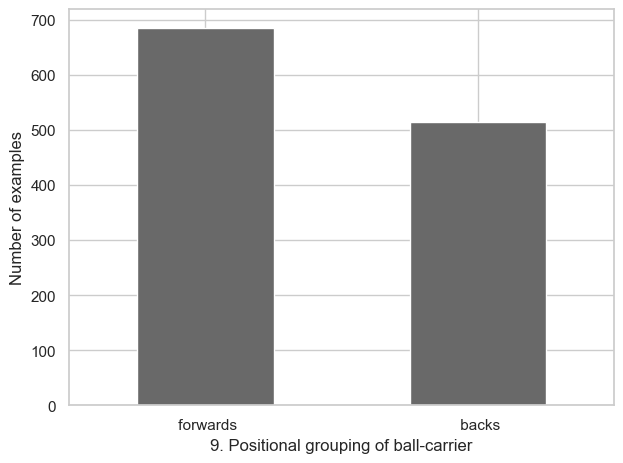

10. Distance from ball-carrier
mod        528
distant    414
near       258
Name: count, dtype: int64


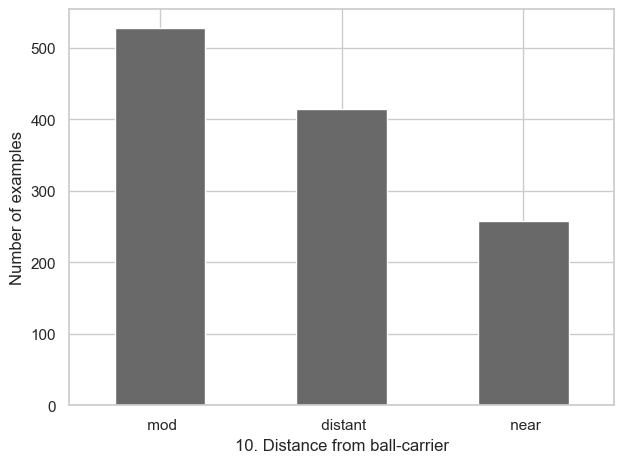

11. Defensive team performance
winning    544
losing     421
drawing    235
Name: count, dtype: int64


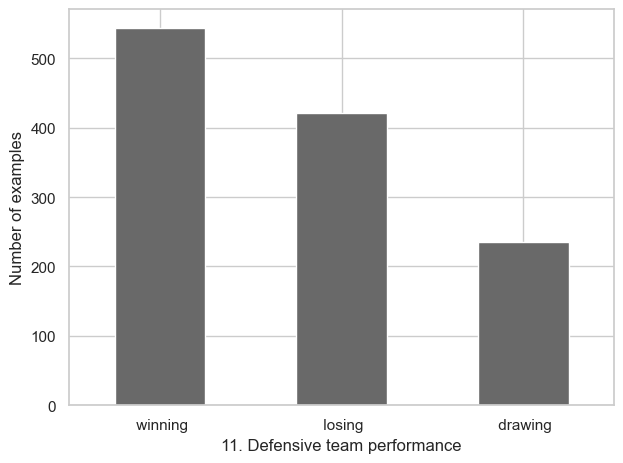

12. Anticipation of ball-carrier
Apparent anticipation    1175
Absent anticipation        25
Name: count, dtype: int64


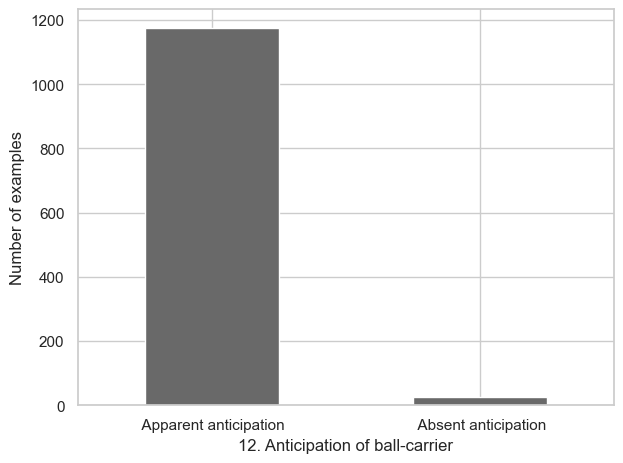

13. Come to balance
Apparent CTB    737
Absent CTB      463
Name: count, dtype: int64


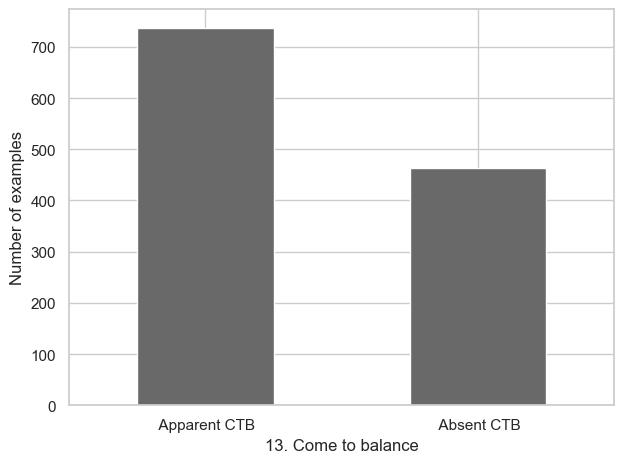

14. Body position of tackler
Bent at waist    852
Upright          348
Name: count, dtype: int64


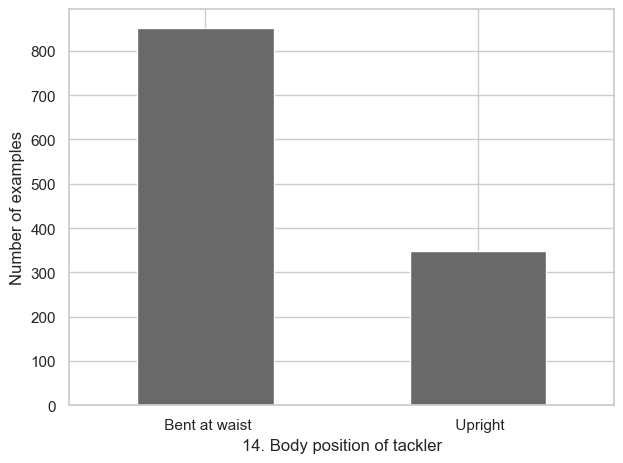

15. Body position of ball-carrier
carrier - upright          689
carrier - bent at waist    511
Name: count, dtype: int64


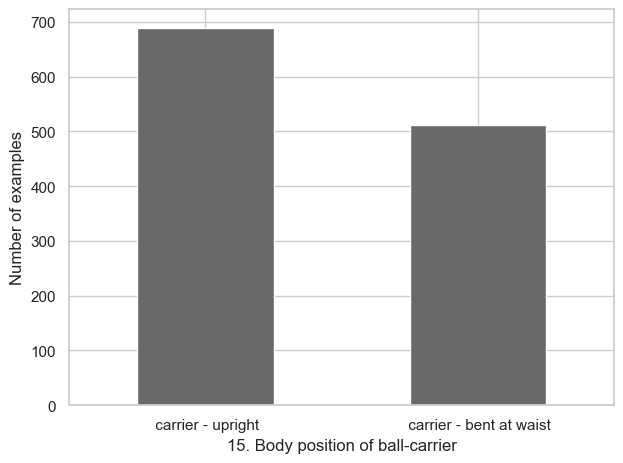

16. Drop height
Absent DH               625
Apparent Drop height    575
Name: count, dtype: int64


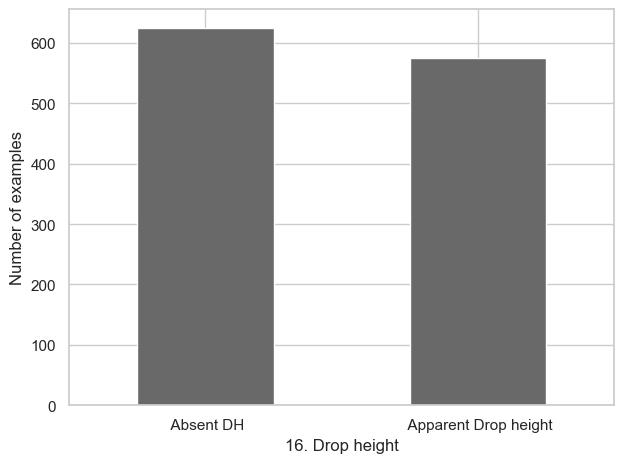

17. Dominant contact angle
Absent DCA      928
Apparent DCA    272
Name: count, dtype: int64


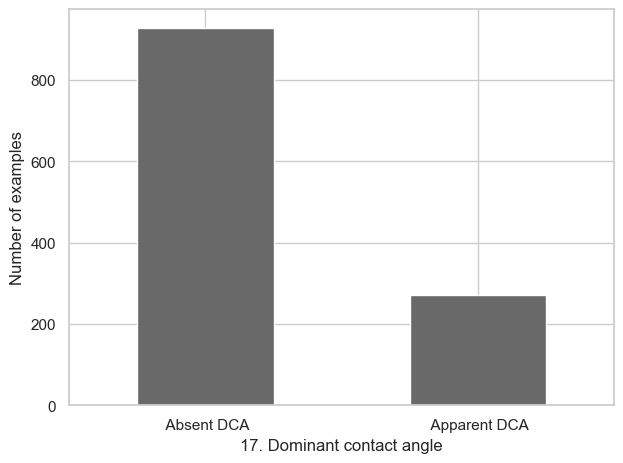

18. Tackler head position
Away or down (incorrect)    617
U+F                         583
Name: count, dtype: int64


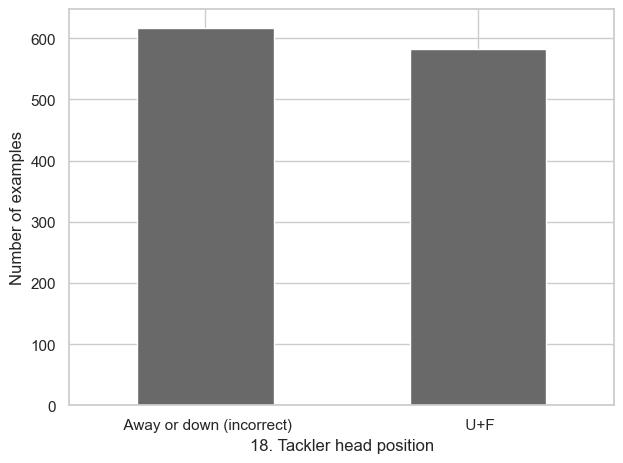

19. Tackler arm position
Down or HAS      918
Correct-boxer    282
Name: count, dtype: int64


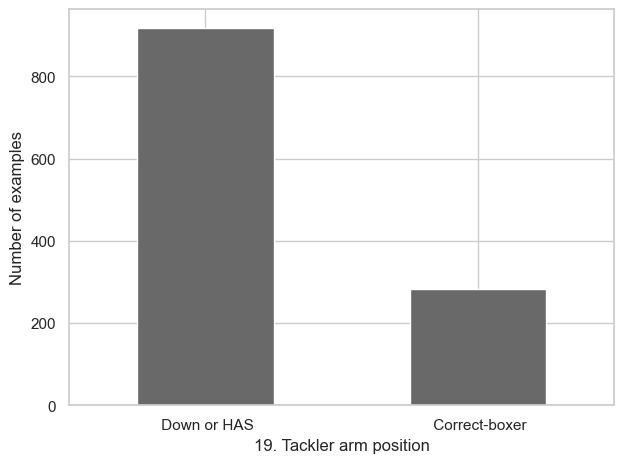

20. Tackler foot placement close to BC
distant FP    941
close FP      259
Name: count, dtype: int64


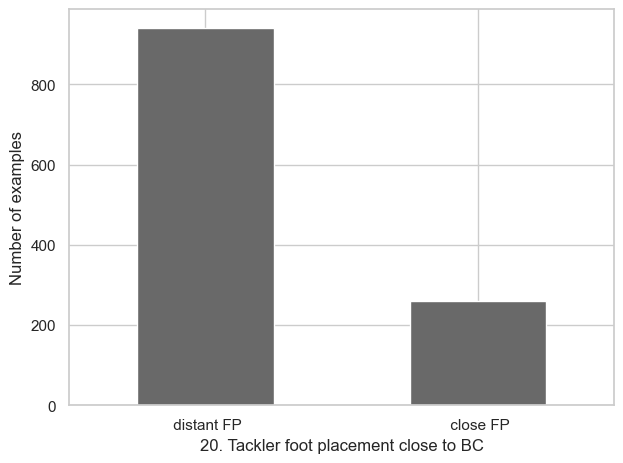

21. Tacklers shoulders infront of hips
Shoulders in front of hips          718
Shoulders in line or behind hips    482
Name: count, dtype: int64


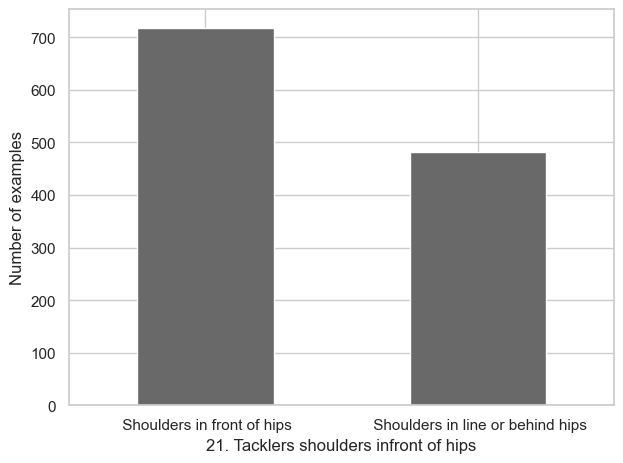

22. Speed of tackler
Mod      589
+Slow    336
Fast     275
Name: count, dtype: int64


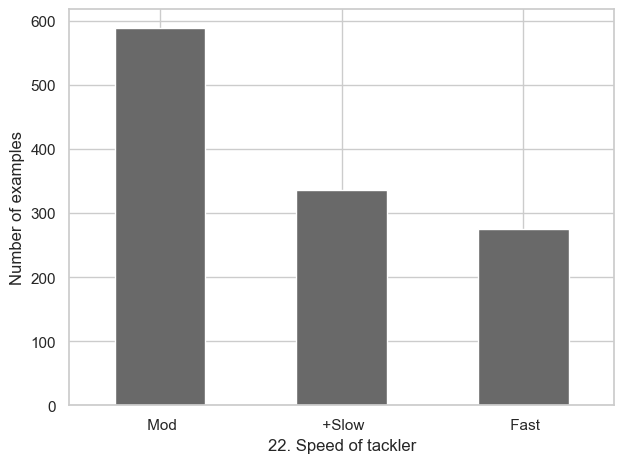

23. Speed of BC
Fast    679
Mod     392
Slow    129
Name: count, dtype: int64


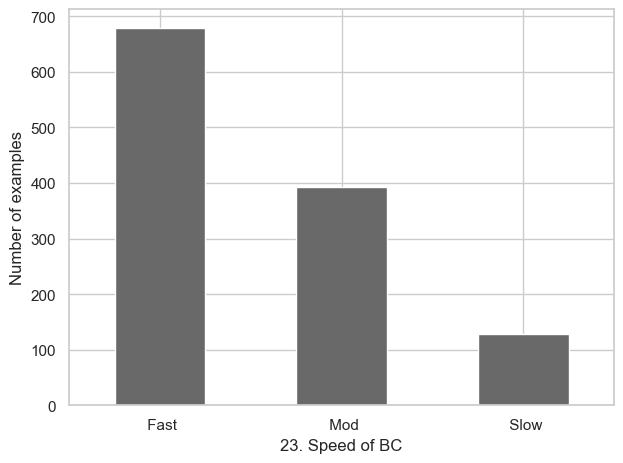

24. BC direction of movement
Straight    389
SStep       355
Diagonal    281
Arc         122
Lateral      53
Name: count, dtype: int64


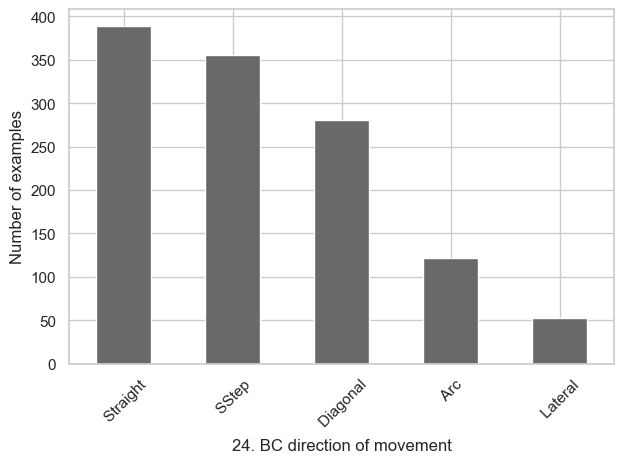

25. Orientation of tackler
In front or oblique    656
Side or behind         544
Name: count, dtype: int64


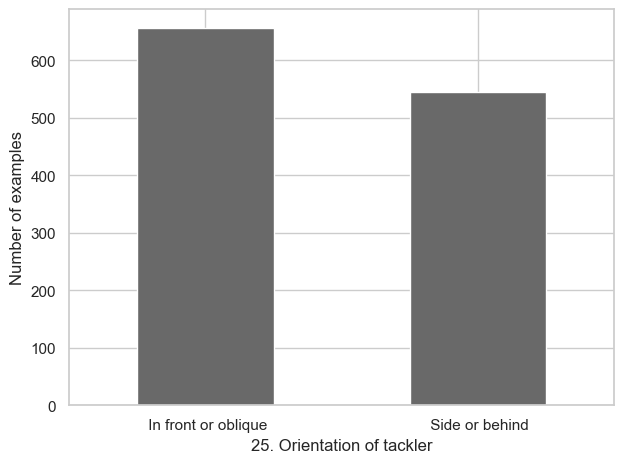

26. Tackle type
arm, jersey, tap    759
shoulder            441
Name: count, dtype: int64


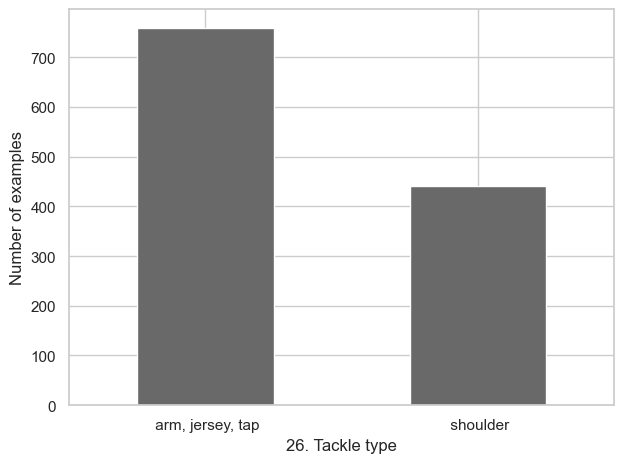

27. Direction of tackle
side or behind       777
oblique, front-on    423
Name: count, dtype: int64


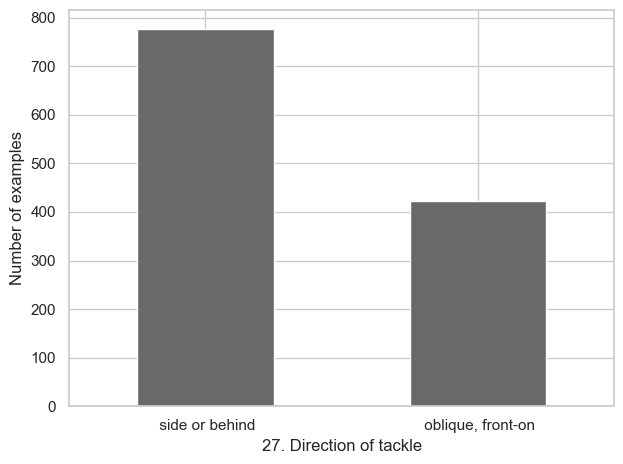

28. Tackler head placement
beside, above or behind    998
infront                    202
Name: count, dtype: int64


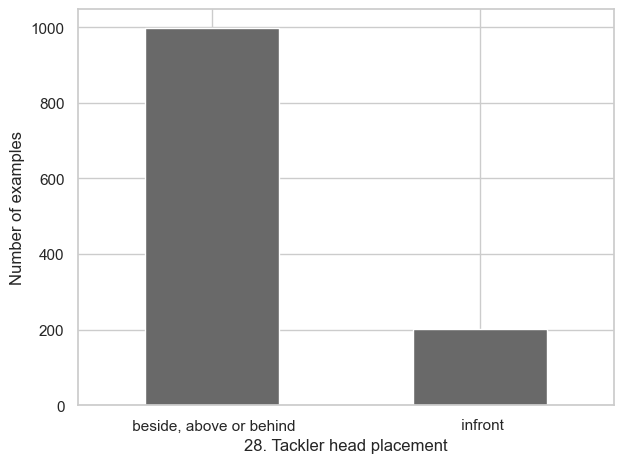

29. Body region struck on tackler
Anywhere else    1134
Head and neck      66
Name: count, dtype: int64


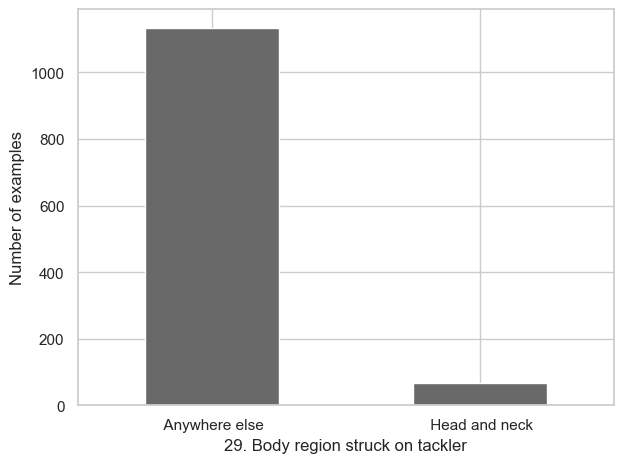

30. Body region struck on BC
Anywhere else     1124
 Head and neck      76
Name: count, dtype: int64


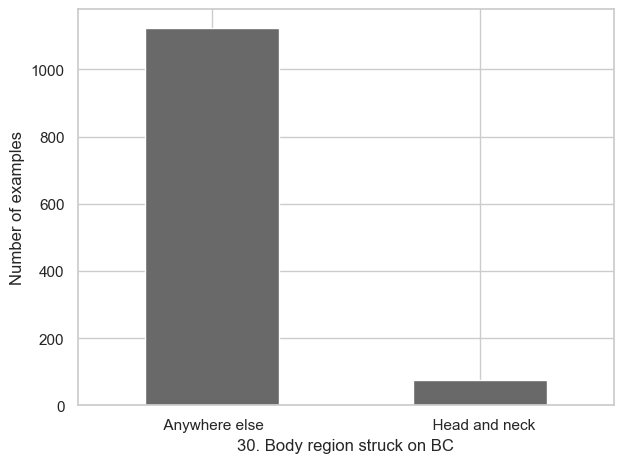

In [7]:
with open(os.path.join("data", "column_name_map.json"), "rb") as f:
    column_name_map = json.load(f)

if not os.path.exists("images"): os.mkdir("images")
# We now make the column names readable (before, we were just making the values readable)    
readable_X_df = readable_X_df.rename(columns=column_name_map) 
# Rotate long labels for readability. 
for col in readable_X_df.columns:
    if len(set(readable_X_df[col].values)) > 3: 
        rot = 45
    else:
        rot=0
    # plot the frequence at each level and save them. 
    readable_X_df[col].value_counts().plot(kind="bar", rot=rot, ylabel="Number of examples", color="dimgray")
    plt.tight_layout()
    plt.savefig(os.path.join("images", "{}_barchart.png".format(col)))
    plt.show()

In [24]:
if not os.path.exists("images"): os.mkdir("images")
# We now make the column names readable (before, we were just making the values readable)    
readable_X_df = readable_X_df.rename(columns=column_name_map) 
# Rotate long labels for readability. 
csv_string = "Variable value, Frequency count\n"
for col in readable_X_df.columns:
    # plot the frequence at each level and save them. 
    val_counts = readable_X_df[col].value_counts()
    col_stripped = col.replace("\n", "")
    col_stripped = col_stripped.replace(",", "")
    csv_string+="{},{}\n".format(col, "")
    for value_i in range(len(val_counts)):
        val_str = val_counts.index[value_i]
        val_stripped = val_str.replace("\n", "")
        val_stripped = val_stripped.replace(",", "")
        csv_string+="{},{}\n".format(val_stripped, val_counts[value_i])
with open("frequency_table.csv", 'w') as f:
    f.write(csv_string)


/var/folders/d0/kwh20_4j0vj9kc4vvqtyk08w0000gn/T/ipykernel_5112/1431172766.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  csv_string+="{},{}\n".format(val_stripped, val_counts[value_i])
/var/folders/d0/kwh20_4j0vj9kc4vvqtyk08w0000gn/T/ipykernel_5112/1431172766.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  csv_string+="{},{}\n".format(val_stripped, val_counts[value_i])
/var/folders/d0/kwh20_4j0vj9kc4vvqtyk08w0000gn/T/ipykernel_5112/1431172766.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit